In [5]:
from numpy.random import seed
seed(1)
import numpy as np
import pandas as pd

#loading data
data=pd.read_excel("C:/Users/User/Desktop/document/HHV.xlsx")
data_pr=pd.read_excel("C:/Users/User/Desktop/document/data_predict.xlsx")
data=data.iloc[2:,1:6]



In [6]:
#setting up columns and setting values to numeric
data.columns=['X1','X2','X3','X4','HHV']
data['X1']=pd.to_numeric(data['X1'])
data['X2']=pd.to_numeric(data['X2'])
data['X3']=pd.to_numeric(data['X3'])
data['X4']=pd.to_numeric(data['X4'])
data['HHV']=pd.to_numeric(data['HHV'])
#data.columns=['X1','X2','X3','X4','HHV']
data.reset_index(drop=True,inplace=True)
data=data.values
X=data[:,0:4]
y=data[:,4]
y=y.astype(float)
X=X.astype(float)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train,y_test=train_test_split(X, y, test_size=0.25,random_state=42 )


In [8]:

#importing necessary libraries
import tensorflow
tensorflow.random.set_seed(2)

n=20  #number of neurons in each layers


#importing keras library and  creating the sequential model

from keras.models import Sequential
from keras.layers import Dense,Activation,Dropout,Flatten

model=Sequential()  #instantiating model

# creating neural network
model.add(Dense(n,activation='ReLU',input_shape=(4,)))
model.add(Dense(n,activation='ReLU'))

model.add(Dense(n,activation='ReLU'))
#model.add(Dense(n,activation='ReLU'))
#model.add(Dense(n,activation='ReLU'))

#model.add(Dropout(0.2))
model.add(Dense(1,activation='linear'))
model.compile(optimizer='adam',
              loss='mse',metrics=['MeanSquaredError'])



In [9]:
epochs=80   


#fitting model
history = model.fit(X_train, y_train,epochs=epochs,validation_split=0.2)

epoch_error=history.history['mean_squared_error']
epoch_error_val=history.history['val_mean_squared_error']

#predicting
model_pr=model.predict(data_pr)
list=[i for i in range(1,epochs+1)]



Epoch 1/80
1/1 [==============================] - 1s 631ms/step - loss: 8.7686 - mean_squared_error: 8.7686 - val_loss: 1.8930 - val_mean_squared_error: 1.8930
Epoch 2/80
1/1 [==============================] - 0s 31ms/step - loss: 5.2804 - mean_squared_error: 5.2804 - val_loss: 2.2543 - val_mean_squared_error: 2.2543
Epoch 3/80
1/1 [==============================] - 0s 32ms/step - loss: 7.8320 - mean_squared_error: 7.8320 - val_loss: 1.8160 - val_mean_squared_error: 1.8160
Epoch 4/80
1/1 [==============================] - 0s 35ms/step - loss: 6.1503 - mean_squared_error: 6.1503 - val_loss: 2.6137 - val_mean_squared_error: 2.6137
Epoch 5/80
1/1 [==============================] - 0s 31ms/step - loss: 4.6696 - mean_squared_error: 4.6696 - val_loss: 5.2154 - val_mean_squared_error: 5.2154
Epoch 6/80
1/1 [==============================] - 0s 33ms/step - loss: 5.3203 - mean_squared_error: 5.3203 - val_loss: 6.9344 - val_mean_squared_error: 6.9344
Epoch 7/80
1/1 [=============================

1/1 [==============================] - 0s 21ms/step - loss: 3.0776 - mean_squared_error: 3.0776


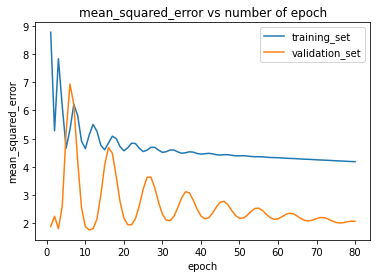

In [10]:
#plotting epoch number against error
import matplotlib.pyplot as plt
plt.title("mean_squared_error vs number of epoch")
plt.xlabel('epoch')
plt.ylabel('mean_squared_error')

plt.plot(list,epoch_error,label='training_set')
plt.plot(list,epoch_error_val,label='validation_set')
plt.legend()
history2=model.evaluate(X_test,y_test)